In [204]:
import pandas as pd
import seaborn as sns
import pytz
import matplotlib.pyplot as plt
import numpy as np

In [108]:
df = pd.read_csv('../Data/20230413_clb_taps.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,Device Code,Direction
0,2023-04-12 23:24:03+00:00,RT046205,Entry
1,2023-04-13 00:25:35+00:00,RT046205,Entry
2,2023-04-13 00:33:41+00:00,RT061806,Exit
3,2023-04-13 00:57:25+00:00,LBCTR,Entry
4,2023-04-13 00:57:43+00:00,RT046203,Entry
...,...,...,...
9641,2023-04-13 12:48:10+00:00,LBCTR,Exit
9642,2023-04-13 12:48:26+00:00,LBCTR,Exit
9643,2023-04-13 12:48:42+00:00,LBCTR,Exit
9644,2023-04-13 12:53:06+00:00,LBCTR,Exit


In [109]:
new_df = df.copy()
new_df['Entry'] = new_df['Direction'].replace({'Entry':1, 'Exit':-1})
new_df = new_df.sort_values('Datetime')
new_df['Occupancy'] = new_df['Entry'].cumsum()
new_df

,Datetime,Device Code,Direction,Entry,Occupancy
6053,2023-04-12 22:57:39+00:00,RT046205,Entry,1,1
4898,2023-04-12 23:21:44+00:00,RT046205,Entry,1,2
4899,2023-04-12 23:21:46+00:00,RT046203,Entry,1,3
0,2023-04-12 23:24:03+00:00,RT046205,Entry,1,4
2294,2023-04-12 23:30:41+00:00,RT046205,Entry,1,5
...,...,...,...,...,...
6052,2023-04-13 12:56:40+00:00,RT046204,Exit,-1,202
3445,2023-04-13 12:56:42+00:00,RT046206,Exit,-1,201
4897,2023-04-13 12:57:41+00:00,LBCTR,Exit,-1,200
8579,2023-04-13 12:57:59+00:00,RT046204,Exit,-1,199


<Axes: xlabel='Datetime', ylabel='Occupancy'>

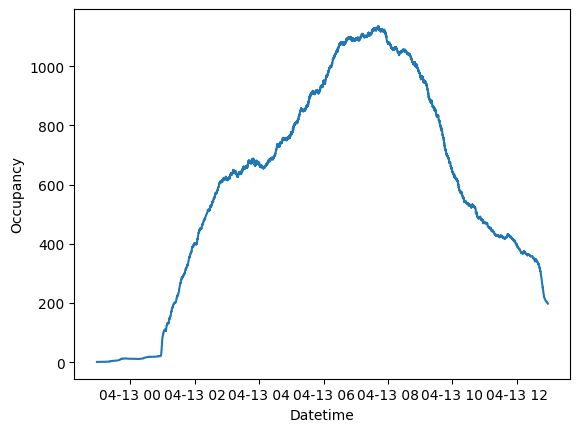

In [110]:
sns.lineplot(new_df, x='Datetime', y='Occupancy')

<Axes: xlabel='Datetime', ylabel='Count'>

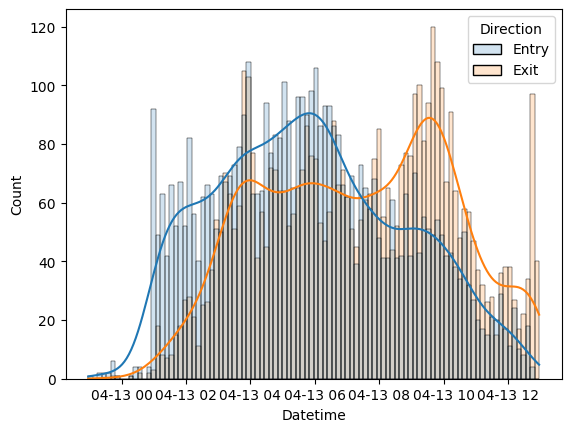

In [111]:
sns.histplot(df, x='Datetime', hue='Direction',bins=100,kde=True,alpha=0.2)

In [112]:
new_df = df.set_index('Datetime')
entry = new_df[new_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
exit = new_df[new_df['Direction']=='Exit']['Direction'].resample('10min',  label='left').count().reset_index()
entry_exit = pd.merge(
    entry,
    exit,
    how='outer',
    on='Datetime'
)
entry_exit.columns = ['Datetime', 'Entry', 'Exit']
entry_exit = entry_exit.fillna(0)
entry_exit

,Datetime,Entry,Exit
0,2023-04-12 22:50:00+00:00,1.0,0.0
1,2023-04-12 23:00:00+00:00,0.0,0.0
2,2023-04-12 23:10:00+00:00,0.0,0.0
3,2023-04-12 23:20:00+00:00,3.0,0.0
4,2023-04-12 23:30:00+00:00,3.0,0.0
...,...,...,...
80,2023-04-13 12:10:00+00:00,22.0,32.0
81,2023-04-13 12:20:00+00:00,13.0,17.0
82,2023-04-13 12:30:00+00:00,18.0,40.0
83,2023-04-13 12:40:00+00:00,7.0,107.0


<Axes: xlabel='Datetime', ylabel='Entry'>

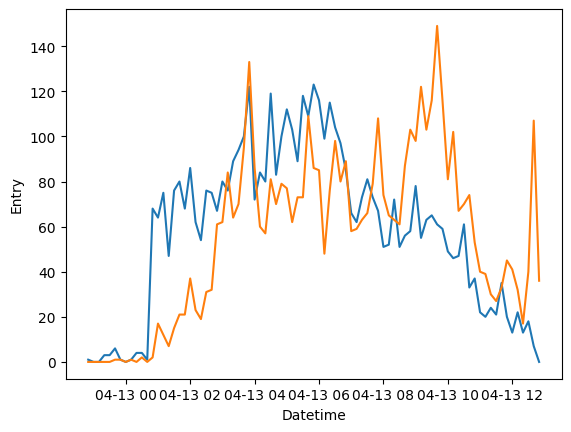

In [113]:
sns.lineplot(entry_exit, x='Datetime', y='Entry')
sns.lineplot(entry_exit, x='Datetime', y='Exit')

Possible things to measure:
- \# of hours studied (turnover), correlated with the levels they prefer to go to, e.g. level 6 low turnover but level 3 high turnover
    - depends on the time they come to library
    - depends on level they study
- preference for factors they take into account (rank/score importance 1-10)
- Seat hogging????

In [114]:
new_df2 = pd.read_csv('../Data/dsa_data.csv')
new_df2['Datetime'] = pd.to_datetime(new_df2['Datetime'])
new_df2.dropna(subset = ['User Number'], inplace=True)
new_df2 = new_df2[(new_df2['Direction']=='Entry') | (new_df2['Direction'] == 'Exit')]
sgt_timezone = pytz.timezone('Asia/Singapore')
new_df2['Datetime'] = new_df2['Datetime'].dt.tz_convert(sgt_timezone)
new_df2['Entry'] = new_df2['Direction'].replace({'Entry':1, 'Exit':-1})
new_df2 = new_df2.sort_values('Datetime')
new_df2['Date'] = new_df2['Datetime'].dt.date
new_df2['Date'] = new_df2['Datetime'].dt.strftime('%Y-%m-%d')
new_df2['Day_of_Week'] = new_df2['Datetime'].dt.strftime('%A')
new_df2['Week_Number'] = new_df2['Datetime'].dt.strftime('%U')
new_df2

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04
...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17


In [115]:
#reading weeks
new_df2['Week_type'] = 'Normal'
new_df2['Date'] = pd.to_datetime(new_df2['Date'])
date_range = new_df2[(new_df2['Date'] >= '2023-02-18') & (new_df2['Date'] <= '2023-02-26')|(new_df2['Date'] >= '2023-04-15') & (new_df2['Date'] <= '2023-04-21')]
date_range['Week_type'] = 'Reading'
new_df2.update(date_range)
new_df2

C:\Users\lakbo\AppData\Local\Temp\ipykernel_27012\1585327047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range['Week_type'] = 'Reading'


,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal
...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Normal
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Normal
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Normal
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Normal


In [183]:
#Exam weeks
date_range = new_df2[(new_df2['Date'] >= '2023-02-27') & (new_df2['Date'] <= '2023-03-04')|(new_df2['Date'] >= '2023-04-22') & (new_df2['Date'] <= '2023-05-06')]
date_range['Week_type'] = 'Exam'
new_df2.update(date_range)
new_df2

C:\Users\lakbo\AppData\Local\Temp\ipykernel_27012\1495230533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range['Week_type'] = 'Exam'


,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type,Occupancy
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,1
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,2
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,3
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,4
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,80
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,81
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,82
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,81


In [117]:
#Finding occupancy throughout the day for the days give
new_df2['Occupancy'] = new_df2.groupby('Date')['Entry'].cumsum()
new_df2

,Datetime,User Number,Broad Category,Library,Method,Direction,Entry,Date,Day_of_Week,Week_Number,Week_type,Occupancy
0,2023-01-25 07:29:13+08:00,2483.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,1
1,2023-01-25 07:32:15+08:00,4372.0,Library Professional,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,2
2,2023-01-25 07:32:35+08:00,2.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,3
3,2023-01-25 07:32:45+08:00,7405.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,4
4,2023-01-25 07:32:49+08:00,2182.0,Others,Central Library,Card,Entry,1,2023-01-25,Wednesday,04,Normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...
127874,2023-04-29 17:00:52+08:00,7423.0,Library Professional,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,80
127913,2023-04-29 17:36:09+08:00,6427.0,Undergraduate,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,81
127914,2023-04-29 17:37:28+08:00,4318.0,Administrative Staff,Central Library,Card,Entry,1,2023-04-29,Saturday,17,Exam,82
127917,2023-04-29 17:38:18+08:00,4318.0,Administrative Staff,Central Library,Card,Exit,-1,2023-04-29,Saturday,17,Exam,81


Text(0.5, 1.0, 'Occupancy Over Time')

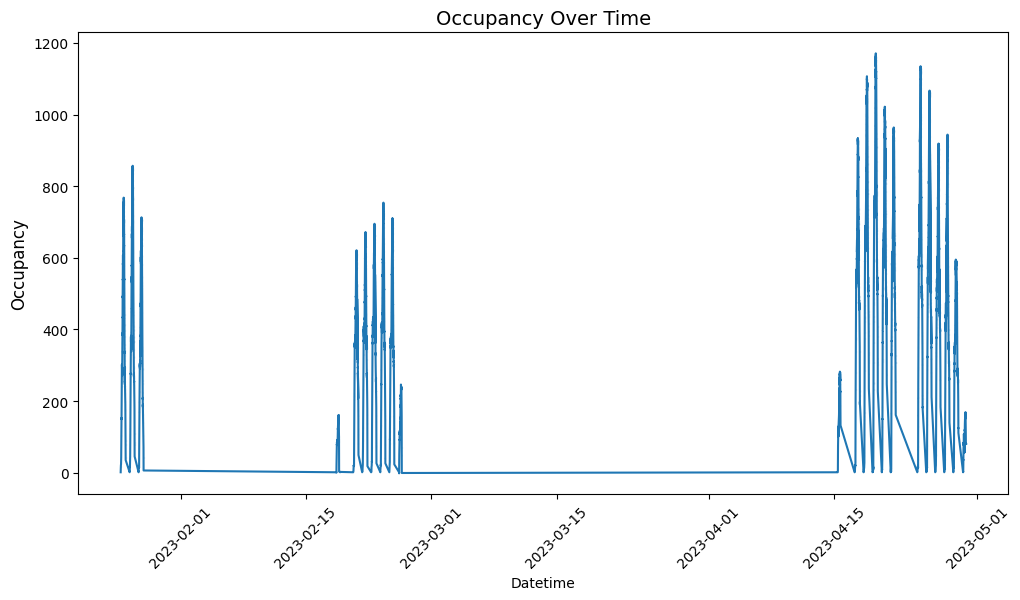

In [118]:
#visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(new_df2, x='Datetime', y='Occupancy')
plt.xticks(rotation=45, fontsize=10)    
plt.ylabel('Occupancy', fontsize=12)
plt.title('Occupancy Over Time', fontsize=14)

In [192]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#exam week
exam_week_df = new_df2[new_df2['Week_type'] == 'Exam']
day_counts = {}
for day in day_order:
    day_df = exam_week_df[exam_week_df['Day_of_Week'] == day]
    unique_dates_count = day_df['Date'].nunique()
    day_counts[day] = unique_dates_count
exam_daily_entry_counts = exam_week_df[exam_week_df['Direction'] == 'Entry'].groupby('Day_of_Week')['Entry'].count()
exam_daily_entry_counts_df = pd.DataFrame({'Entry_Count': exam_daily_entry_counts})
exam_daily_entry_counts_df = exam_daily_entry_counts_df.reset_index()
exam_daily_entry_counts_df['Day_of_Week'] = pd.Categorical(exam_daily_entry_counts_df['Day_of_Week'], categories=day_order, ordered=True)
exam_daily_entry_counts_df = exam_daily_entry_counts_df.sort_values('Day_of_Week')
exam_daily_entry_counts_df = exam_daily_entry_counts_df.reset_index(drop=True)
exam_daily_entry_counts_df['Entry_Count'] = exam_daily_entry_counts_df['Entry_Count'] / exam_daily_entry_counts_df['Day_of_Week'].map(day_counts)
exam_daily_entry_counts_df



,Day_of_Week,Entry_Count
0,Monday,4098.0
1,Tuesday,3891.0
2,Wednesday,3319.0
3,Thursday,3182.0
4,Friday,2470.0
5,Saturday,610.0


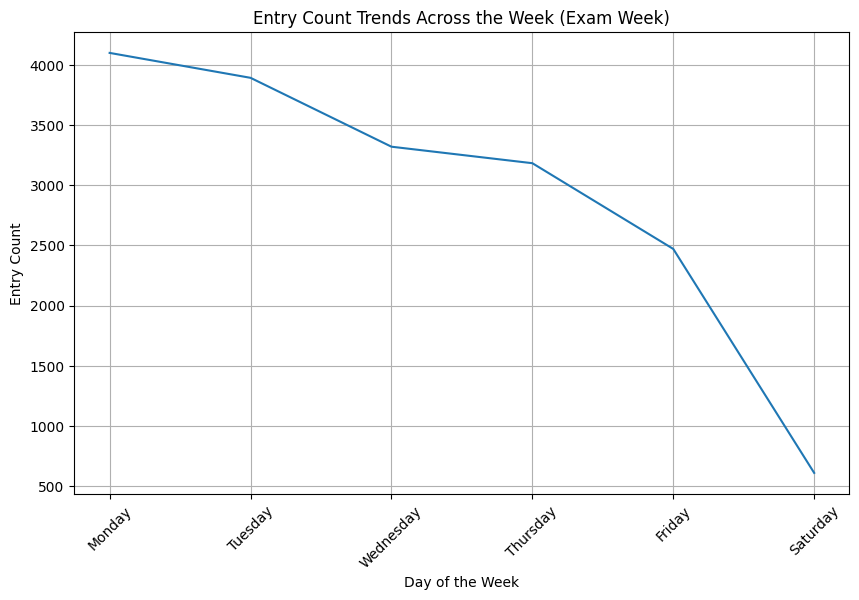

In [207]:
#visualisation of trend during exam weeks
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(exam_daily_entry_counts_df['Day_of_Week'], exam_daily_entry_counts_df['Entry_Count'])
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Exam Week)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [208]:
#reading
reading_week_df = new_df2[new_df2['Week_type'] == 'Reading']
day_counts = {}
for day in day_order:
    day_df = reading_week_df[reading_week_df['Day_of_Week'] == day]
    unique_dates_count = day_df['Date'].nunique()
    day_counts[day] = unique_dates_count
reading_entry_counts = reading_week_df[reading_week_df['Direction'] == 'Entry'].groupby('Day_of_Week')['Entry'].count()
reading_daily_entry_counts_df = pd.DataFrame({'Entry_Count': reading_entry_counts})
reading_daily_entry_counts_df = reading_daily_entry_counts_df.reset_index()
reading_daily_entry_counts_df['Day_of_Week'] = pd.Categorical(reading_daily_entry_counts_df['Day_of_Week'], categories=day_order, ordered=True)
reading_daily_entry_counts_df = reading_daily_entry_counts_df.sort_values('Day_of_Week')
reading_daily_entry_counts_df = reading_daily_entry_counts_df.reset_index(drop=True)
reading_daily_entry_counts_df['Entry_Count'] = reading_daily_entry_counts_df['Entry_Count'] / reading_daily_entry_counts_df['Day_of_Week'].map(day_counts)
reading_daily_entry_counts_df

,Day_of_Week,Entry_Count
0,Monday,2643.000000
1,Tuesday,3062.500000
2,Wednesday,3119.000000
3,Thursday,2956.500000
4,Friday,2816.500000
5,Saturday,554.666667


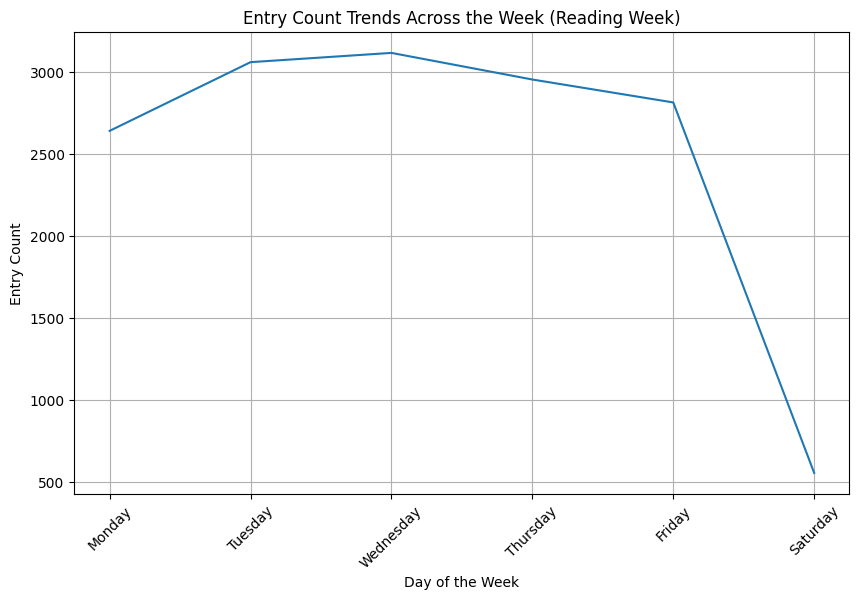

In [209]:
#trend across the week for reading weeks
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(reading_daily_entry_counts_df['Day_of_Week'], reading_daily_entry_counts_df['Entry_Count'])
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Reading Week)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [197]:
#normal
normal_week_df = new_df2[new_df2['Week_type'] == 'Normal']
day_counts = {}
for day in day_order:
    day_df = normal_week_df[normal_week_df['Day_of_Week'] == day]
    unique_dates_count = day_df['Date'].nunique()
    day_counts[day] = unique_dates_count
normal_entry_counts = normal_week_df[normal_week_df['Direction'] == 'Entry'].groupby('Day_of_Week')['Entry'].count()
normal_daily_entry_counts_df = pd.DataFrame({'Entry_Count': normal_entry_counts})
normal_daily_entry_counts_df = normal_daily_entry_counts_df.reset_index()
normal_daily_entry_counts_df['Day_of_Week'] = pd.Categorical(normal_daily_entry_counts_df['Day_of_Week'], categories=day_order, ordered=True)
normal_daily_entry_counts_df = normal_daily_entry_counts_df.sort_values('Day_of_Week')
normal_daily_entry_counts_df = normal_daily_entry_counts_df.reset_index(drop=True)
normal_daily_entry_counts_df['Entry_Count'] = normal_daily_entry_counts_df['Entry_Count'] / normal_daily_entry_counts_df['Day_of_Week'].map(day_counts)
normal_daily_entry_counts_df

,Day_of_Week,Entry_Count
0,Wednesday,2877.0
1,Thursday,3190.0
2,Friday,2644.0


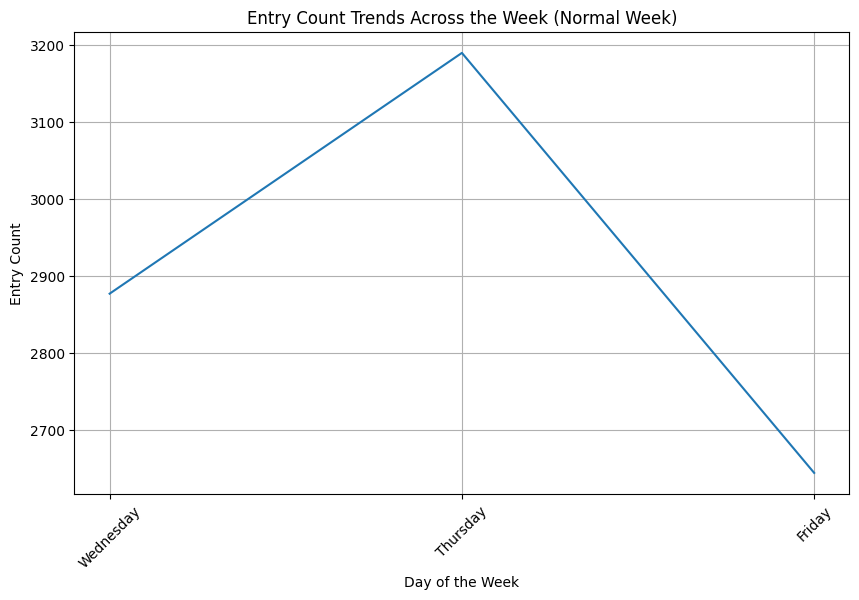

In [210]:
#trend during normal week
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(normal_daily_entry_counts_df['Day_of_Week'], normal_daily_entry_counts_df['Entry_Count'])
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week (Normal Week)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [198]:
#check
day_counts = {}
for day in day_order:
    day_df = new_df2[new_df2['Day_of_Week'] == day]
    unique_dates_count = day_df['Date'].nunique()
    day_counts[day] = unique_dates_count
day_counts

{'Monday': 3,
 'Tuesday': 3,
 'Wednesday': 4,
 'Thursday': 4,
 'Friday': 4,
 'Saturday': 4,
 'Sunday': 0}

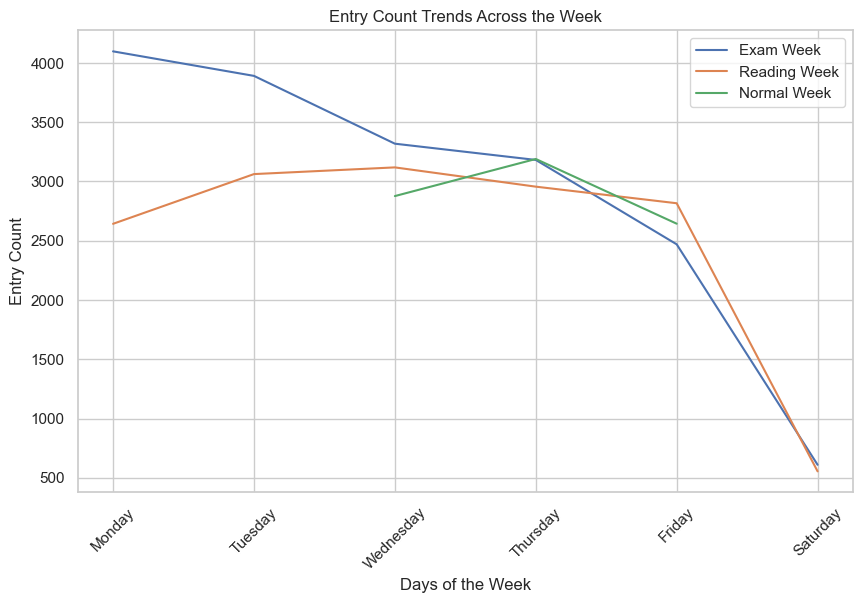

In [212]:
#visualisation
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(exam_daily_entry_counts_df['Day_of_Week'], exam_daily_entry_counts_df['Entry_Count'], label="Exam Week")
ax.plot(reading_daily_entry_counts_df['Day_of_Week'], reading_daily_entry_counts_df['Entry_Count'], label="Reading Week")
ax.plot(normal_daily_entry_counts_df['Day_of_Week'], normal_daily_entry_counts_df['Entry_Count'], label="Normal Week")
ax.set_xlabel("Days of the Week")
ax.set_ylabel("Entry Count")
ax.set_title("Entry Count Trends Across the Week")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()
